# データ解析特論 2022年度水曜２限

# 第10回 その1 ハードマージンSVMで線形分離

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## データ

サイズ $N$ の平面データ $(x_n^{(1)}, \ x_n^{(2)})$ を乱数で生成し，そのラベルを
- ラベル $y_n \in \{1, \ -1\}$
    - $x_1 < x_2$ だとラベル 1
    - $x_1 > x_2$ だとラベル -1
として作る．

まずは線形分離できるデータに対してハードマージンSVMを試そう．

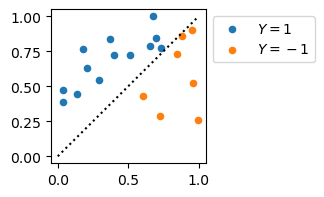

In [2]:
# サンプルサイズ
N = 20

# seed
np.random.seed(seed=2222)

# X
X = np.random.rand(N, 2)

# x_1 > x_2 ならラベルは -1
Y = np.ones(N)
Y[X[:, 0]>X[:, 1]] = -1

# scatter plot
fig, ax = plt.subplots(figsize=(2, 2))
ax.scatter(X[:, 0][Y== 1], X[:, 1][Y== 1], s=20, c='tab:blue', label=r'$Y= 1$')
ax.scatter(X[:, 0][Y==-1], X[:, 1][Y==-1], s=20, c='tab:orange', label=r'$Y=-1$')
ax.plot([0, 1], [0, 1], 'k:')
ax.legend(bbox_to_anchor=(1, 1))

## ハードマージンSVM

分離直線を $a^{(0)} + \mathbf x \mathbf A = 0$ とする．

拘束条件
$$
g_n(\mathbf A, \ a^{(0)}) 
= 1 - y_{n} \left(a^{(0)} + \mathbf x_{n} \mathbf A \right) \le 0
\quad (n = 1, \ 2, \ \ldots, \ N)
$$
の下で
$$
f(\mathbf A, \ a^{(0)}) = \frac12\|\mathbf A\|^2
$$
最大化する問題を考える．

## KKT条件

KKT条件から
$$
\Phi(\mathbf A, a^{(0)}, \boldsymbol\lambda)
= f(\mathbf A, a^{(0)})
+ \sum_{n=1}^N \lambda_n \, g_n (\mathbf A, a^{(0)})
$$
の停留点を求める問題に帰着される．すなわち，
$$
\begin{cases}
\displaystyle
-\nabla f(\mathbf A, a^{(0)})
= \sum_{n=1}^N \lambda_n \nabla g_n(\mathbf A, a^{(0)})
\\
\lambda_n \ge 0, \quad
\lambda_n \, g_n(\mathbf A, a^{(0)}) = 0 
\quad (n=1, \ 2, \ \ldots, \ N)
\end{cases}
$$
を解く．

## 双対問題

KKT条件から
$$
\mathbf A = \sum_{n=1}^N \lambda_n \, y_{n} \, \mathbf x_n^{\mathrm T}
=: \mathbf A_{\boldsymbol\lambda}
$$
と $\mathbf A$ を $\boldsymbol\lambda$ によって表すことができる．これを $\Phi$ に代入すると
$$
\Psi(\boldsymbol\lambda) := \Phi(\mathbf A_{\boldsymbol\lambda}, \ a^{(0)}, \ \boldsymbol\lambda)
= -\frac12 \sum_{n=1}^N \sum_{n'=1}^N \lambda_n \, \lambda_{n'} \, y_{n} \, y_{n'} \, \mathbf x_n \, \mathbf x_{n'}^{\mathrm T} 
+ \sum_{n=1}^N \lambda_n 
$$
を得る．この $\Psi(\boldsymbol\lambda)$ の最大点を
$$
\lambda_n \ge 0 \quad (n=1, \ 2, \ \ldots, \ N), \quad
\sum_{n=1}^N \lambda_n \, y_n= 0
$$
の範囲で解く．

## 解法

双対問題を $\sum_{n=1}^N \lambda_n \, y_n= 0$ だけ条件を加味し，その条件付き最大を Lagrange の未定乗数法を用いて解くことにして，$\lambda_n \ge 0$ は別に考える．
つまり，
$$
\tilde\Psi(\boldsymbol\lambda, \sigma)
= \Psi(\boldsymbol\lambda) - \sigma \sum_{n=1}^N \lambda_n \, y_n
$$
の最大値を $\lambda_n \ge 0$ の範囲で求める．

1. $\boldsymbol\lambda \leftarrow \boldsymbol\lambda + \eta\nabla_{\boldsymbol\lambda}\tilde\Psi$ によって $\boldsymbol\lambda$ を更新する．
1. $\sigma \leftarrow \sigma - \eta\frac{\partial \tilde\Psi}{\partial\sigma}$ によって $\sigma$ を更新する．
1. この $\boldsymbol\lambda$ に対して，$\lambda_n < 0$ となっていたら $\lambda_n =0$ と置き直す．
1. 収束するまで 1 に戻って繰り返す．

## 勾配

この勾配は
$$
\begin{align}
&
\frac{\partial \tilde\Psi}{\partial \lambda_k} 
= \frac{\partial}{\partial \lambda_k} \left( -\frac12 \sum_{n=1}^N \sum_{n'=1}^N \lambda_n \lambda_{n'} y_n y_{n'} \mathbf x_n^{\mathrm T} \mathbf x_{n'} + \sum_{n=1}^N \lambda_n - \sigma \sum_{n=1}^N \lambda_n \, y_n \right)
\\
&
\phantom{\frac{\partial \Psi}{\partial \lambda_k} }
= -\frac12 \sum_{n=1}^N \sum_{n'=1}^N ( \delta_{kn} \lambda_{n'} + \lambda_n \delta_{kn'}) y_n y_{n'} \mathbf x_n^{\mathrm T} \mathbf x_{n'} + 1 - \sigma y_k
\\
&
\phantom{\frac{\partial \Psi}{\partial \lambda_k} }
= -\frac12 \sum_{n'=1}^N \lambda_{n'} y_k y_{n'} \mathbf x_k^{\mathrm T} \mathbf x_{n'}
-\frac12 \sum_{n=1}^N \lambda_{n} y_{n} y_{k} \mathbf x_n^{\mathrm T} \mathbf x_{k}
+ 1
- \sigma y_k
\\
&
\phantom{\frac{\partial \Psi}{\partial \lambda_k} }
= -\sum_{n=1}^N \lambda_{n} y_{n} y_{k} \mathbf x_n^{\mathrm T} \mathbf x_{k}
+ 1
- \sigma y_k
\end{align}
$$
なので，行列 $\mathbf B = (B_{ij})$
$$
B_{ij} = y_{n} y_{k} \mathbf x_n^{\mathrm T} \mathbf x_{k}
$$
と定めておくと，
$$
\nabla_{\boldsymbol\lambda}\tilde\Psi = 1 - \mathbf B \boldsymbol\lambda - \sigma \mathbf y
$$
と表すことができる．

また，
$$
\frac{\partial \tilde\Psi}{\partial \sigma}
= \frac{\partial}{\partial \sigma} \left( -\frac12 \sum_{n=1}^N \sum_{n'=1}^N \lambda_n \lambda_{n'} y_n y_{n'} \mathbf x_n^{\mathrm T} \mathbf x_{n'} + \sum_{n=1}^N \lambda_n - \sigma \sum_{n=1}^N \lambda_n \, y_n \right)
= -\sum_{n=1}^N \lambda_n \, y_n
$$

よって，勾配降下法では
$$
\begin{cases}
\boldsymbol\lambda^{(i+1)} \ \leftarrow \ \boldsymbol\lambda^{(i)} + \eta \nabla_{\boldsymbol\lambda}\tilde\Psi(\boldsymbol\lambda^{(i)}, \sigma^{(i)})
\\
\sigma^{(i+1)} \ \leftarrow \ \sigma^{(i)} - \eta \frac{\partial}{\partial\sigma}\tilde\Psi(\boldsymbol\lambda^{(i)}, \sigma^{(i)})
\end{cases}
$$
の反復で計算する．ただし $\eta>0$ は学習率．

適当な反復の収束判定の閾値 tol を用いて，
$$
\|\boldsymbol\lambda^{(i+1)}-\boldsymbol\lambda^{(i)} \|
+ \|\sigma^{(i+1)}-\sigma^{(i)} \|
< \mbox{tol}
$$
となったら反復を停止する．

## 計算

In [6]:
%%time
# lambda の初期値
lamb = np.ones(N)

# lambda_n * y_n の総和が 0 になるように修正
lamb -= np.dot(lamb, Y)*Y/np.sum(Y**2)

# 確認
print(np.sum(Y*lamb))

# sigma の初期値
sigma = np.random.rand()

# learning rate
eta = 0.01

# 勾配降下法 (Gradient Descent) の最大反復回数
max_iter = 1000000

# lamb の収束判定の閾値
tol = 1e-6

# matrix B
B = (np.diag(Y)@X)@(np.diag(Y)@X).T
# BB = np.zeros((N, N))
# for k in range(N):
#     for n in range(N):
#         BB[k, n] += Y[n]*Y[k]*np.dot(X[n], X[k])
# np.max(np.abs(B-BB))

### 勾配降下法 ###
for i_iter in range(max_iter):
    # 前のステップの lambda と sigma を格納
    lamb_prev = np.copy(lamb)
    sigma_prev = sigma
    
    # Psi の勾配
    grad_Psi = 1.0 - B@lamb - sigma*Y
    
    # 勾配上昇法で lambda を更新
    lamb += eta*grad_Psi
    
    # lamb が負だったら 0 に修正
    lamb[lamb<0.0] = 0.0
    
    # 勾配降下法で sigma を更新
    sigma += eta * np.sum(lamb*Y)
    
    # lamb と sigma の収束判定
    if np.max(np.abs(lamb-lamb_prev)) + np.abs(sigma-sigma_prev) < tol:
        print(i_iter)
        break
    
print(lamb)
print('np.sum(lamb*Y) = %f'%np.sum(lamb*Y))
print(np.max(np.abs(lamb-lamb_prev)))
print(np.abs(sigma-sigma_prev))

-8.881784197001252e-16
244906
[  0.           0.           0.         223.32053862   0.
   0.           0.           0.           0.           0.
   0.           0.          96.4228958    0.           0.
   0.         319.74343668   0.           0.           0.        ]
np.sum(lamb*Y) = 0.000002
9.77418437742017e-07
2.2552115730434252e-08
CPU times: user 5.88 s, sys: 216 ms, total: 6.1 s
Wall time: 5.96 s


## 結果の可視化

[-21.30878827  13.6151748 ]
[6.04773925 6.04777923 6.04790585]


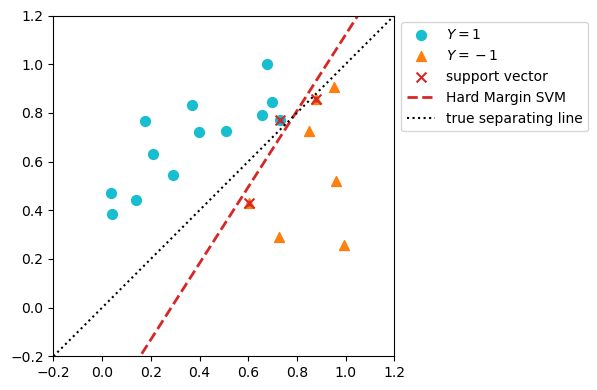

[[ 7  0]
 [ 0 13]]


In [9]:
# 方程式のパラメータ
#A = (lamb*Y.reshape(1, -1)@X)[0]
A = (lamb*Y)@X
A1, A2 = A
print(A)

# 方程式の定数項はサポートベクトルでの平均で取る
print(Y[lamb>0] - X[lamb>0]@A)
A0 = np.mean(Y[lamb>0] - X[lamb>0]@A)

# scatter plot with determining line
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X[:, 0][Y>0], X[:, 1][Y>0], marker='o', s=50, c='tab:cyan', label=r'$Y=1$')
ax.scatter(X[:, 0][Y<0], X[:, 1][Y<0], marker='^', s=50, c='tab:orange', label=r'$Y=-1$')
ax.scatter(X[:, 0][lamb>0][Y[lamb>0]>0], X[:, 1][lamb>0][Y[lamb>0]>0], s=10, c='tab:blue', marker='o', zorder=2)
ax.scatter(X[:, 0][lamb>0][Y[lamb>0]<0], X[:, 1][lamb>0][Y[lamb>0]<0], s=10, c='tab:red', marker='^', zorder=2)
ax.scatter(X[:, 0][lamb>0], X[:, 1][lamb>0], s=50, c='tab:red', marker='x', zorder=2, label='support vector')

# A0*X0 + A1*X1 + C = 0 <=> X1 = -A0/A1*X0 - -A0/A1
ax.plot([-0.2, 1.2], [-A0/A2-A1/A2*-0.2, -A0/A2-A1/A2*1.2], '--', lw=2, c='tab:red', label='Hard Margin SVM')
ax.plot([-0.2, 1.2], [-0.2, 1.2], ':k', label='true separating line')

ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_aspect(1)
fig.tight_layout()
plt.show()

# きちんと判定できているか確認
# A0 + X@A = 0
Ypred = np.ones(N)
Ypred[X@A + A0 <0] = -1
print(confusion_matrix(Y, Ypred))

## ソフトマージンSVM

KKT条件から双対問題を導くと，ハードマージンSVMの時と同じ関数を扱うことになる．
$$
\Psi(\boldsymbol\lambda) 
= -\frac12 \sum_{n=1}^N \sum_{n'=1}^N \lambda_n \, \lambda_{n'} \, y_{n} \, y_{n'} \, \mathbf x_n \, \mathbf x_{n'}^{\mathrm T} 
+ \sum_{n=1}^N \lambda_n 
$$
を得る．ただし，$\Psi(\boldsymbol\lambda)$ の最大点を求める範囲は
$$
0 \le \lambda_n \le \gamma \quad (n=1, \ 2, \ \ldots, \ N), \quad
\sum_{n=1}^N \lambda_n \, y_n= 0
$$
と制限する．

## 解法

ハードマージンの時と基本は同じ．3 だけ

3. この $\boldsymbol\lambda$ に対して，
    - $\lambda_n < 0$ となっていたら $\lambda_n =0$  と置き直す．
    - $\lambda_n > \gamma$ となっていたら $\lambda_n =\gamma$  と置き直す．

に変更する．

## データ

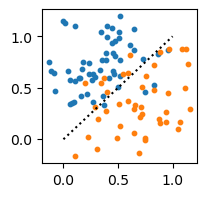

In [15]:
# データサイズ
N = 100

# seed
np.random.seed(seed=2222)

# X
X = np.random.rand(N, 2)

# x_1 > x_2 ならラベルは -1
Y = np.ones(N)
Y[X[:, 0]>X[:, 1]] = -1

# データをずらす
X += (np.random.rand(N, 2)-0.5)*0.5

# scatter plot
fig, ax = plt.subplots(figsize=(2, 2))
ax.scatter(X[:, 0][Y== 1], X[:, 1][Y== 1], s=10, c='tab:blue')
ax.scatter(X[:, 0][Y==-1], X[:, 1][Y==-1], s=10, c='tab:orange')
ax.plot([0, 1], [0, 1], ':k')

## 計算

In [16]:
%%time
# gamma
gamma = 10.0

# lambda の初期値
lamb = np.ones(N)

# lambda_n * y_n の総和が 0 になるように修正
lamb -= np.dot(lamb, Y)*Y/np.sum(Y**2)

# 確認
print(np.sum(Y*lamb))

# sigma の初期値
sigma = np.random.rand()

# learning rate
eta = 0.01

# 勾配降下法 (Gradient Descent) の最大反復回数
max_iter = 1000000

# lamb の収束判定の閾値
tol = 1e-6

# matrix B
B = (np.diag(Y)@X)@(np.diag(Y)@X).T

### 勾配降下法 ###
for i_iter in range(max_iter):
    # 前のステップの lambda と sigma を格納
    lamb_prev = np.copy(lamb)
    sigma_prev = sigma
    
    # Psi の勾配
    grad_Psi = 1.0 - B@lamb - sigma*Y
    
    # 勾配上昇法で lambda を更新
    lamb += eta*grad_Psi
    
    # lamb が負だったら 0 に修正
    lamb[lamb<0.0] = 0.0
    
    # lamb が gamma より大きければ gamma に修正
    lamb[lamb>gamma] = gamma
    
    # 勾配降下法で sigma を更新
    sigma += eta * np.sum(lamb*Y)
    
    # lamb と sigma の収束判定
    if np.max(np.abs(lamb-lamb_prev)) + np.abs(sigma-sigma_prev) < tol:
        print(i_iter)
        break
    
print(lamb)
print('np.sum(lamb*Y) = %f'%np.sum(lamb*Y))
print(np.max(np.abs(lamb-lamb_prev)))
print(np.abs(sigma-sigma_prev))

-4.218847493575595e-15
411197
[10.         10.          0.         10.          0.          0.
  0.          0.          0.          0.          0.         10.
  9.35313748 10.          0.          0.          0.          0.
 10.         10.          0.         10.          0.         10.
  0.          0.          0.         10.         10.          0.
  0.         10.          0.          0.         10.          0.
  0.          0.          0.         10.          0.         10.
 10.          0.          0.         10.          0.         10.
  0.          6.59304739  0.          0.          0.         10.
  0.          0.          0.          0.          0.          0.
 10.         10.          0.          0.         10.         10.
 10.          0.         10.          0.          0.          0.
  0.         10.          0.          0.          0.          0.
  0.         10.          0.          0.          0.          0.
  5.94620018  0.          0.         10.         10.        

## 結果の可視化

[-4.22914941  4.24350141]
[-0.13056427 -0.13045726 -0.13048603]


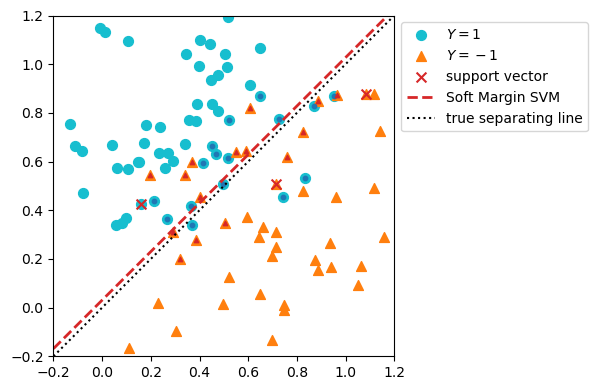

[[37  7]
 [ 6 50]]


In [23]:
# 方程式のパラメータ
#A = (lamb*Y.reshape(1, -1)@X)[0]
A = (lamb*Y)@X
A1, A2 = A
print(A)

# 方程式の定数項はサポートベクトルでの平均で取る
print(Y[(lamb>0)*(lamb<gamma)] - X[(lamb>0)*(lamb<gamma)]@A)
A0 = np.mean(Y[(lamb>0)*(lamb<gamma)] - X[(lamb>0)*(lamb<gamma)]@A)

# scatter plot with determining line
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X[:, 0][Y>0], X[:, 1][Y>0], marker='o', s=50, c='tab:cyan', label=r'$Y=1$')
ax.scatter(X[:, 0][Y<0], X[:, 1][Y<0], marker='^', s=50, c='tab:orange', label=r'$Y=-1$')
ax.scatter(X[:, 0][lamb==gamma][Y[lamb==gamma]>0], X[:, 1][lamb==gamma][Y[lamb==gamma]>0], s=10, c='tab:blue', marker='o', zorder=2)
ax.scatter(X[:, 0][lamb==gamma][Y[lamb==gamma]<0], X[:, 1][lamb==gamma][Y[lamb==gamma]<0], s=10, c='tab:red', marker='^', zorder=2)
ax.scatter(X[:, 0][(lamb>0)*(lamb<gamma)], X[:, 1][(lamb>0)*(lamb<gamma)], s=50, c='tab:red', marker='x', zorder=2, label='support vector')

# A0*X0 + A1*X1 + C = 0 <=> X1 = -A0/A1*X0 - -A0/A1
ax.plot([-0.2, 1.2], [-A0/A2-A1/A2*-0.2, -A0/A2-A1/A2*1.2], '--', lw=2, c='tab:red', label='Soft Margin SVM')
ax.plot([-0.2, 1.2], [-0.2, 1.2], ':k', label='true separating line')

ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_aspect(1)
fig.tight_layout()
plt.show()

# きちんと判定できているか確認
# A0 + X@A = 0
Ypred = np.ones(N)
Ypred[X@A + A0 <0] = -1
print(confusion_matrix(Y, Ypred))

## 課題10-1

`sklearn` に入っている iris データセットを用いて，`setosa` と `versicolor` に対してハードマージンSVMを実行せよ．

X としては `sepal length (cm)`, `sepal width (cm)` の2変数を用いること．

`setosa` は `iris.target` のラベル 0, `versicolor` はラベル 1 として格納されているので，ラベルが $\pm1$ となるようにラベルを付け替えること．


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


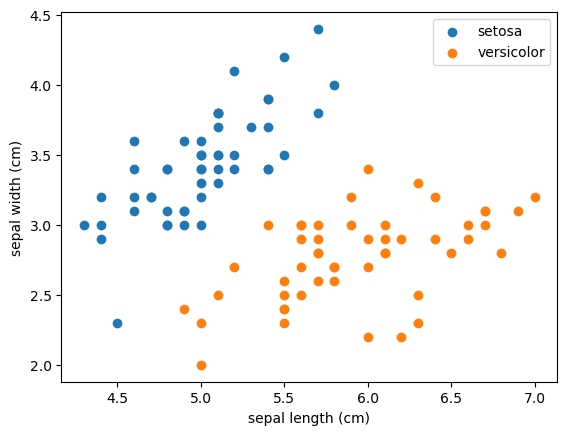

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target
print(iris.feature_names)
print(iris.target_names)

plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], label='%s'%iris.target_names[0])
plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], label='%s'%iris.target_names[1])
plt.xlabel('%s'%iris.feature_names[0])
plt.ylabel('%s'%iris.feature_names[1])
plt.legend()

# X と Y を SVM が使えるように修正すること

## 以上